In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = 'images/board.png'
img = cv2.imread(filename)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def nothing(x):
    pass

filename = 'images/temp.jpg'

cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)

while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    dst = cv2.dilate(dst,None)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)

cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np

filename = 'images/1.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0) dst = np.uint8(dst)

ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imshow('image',img)
cv2.destroyAllWindows()


SyntaxError: invalid syntax (3792448211.py, line 11)

469


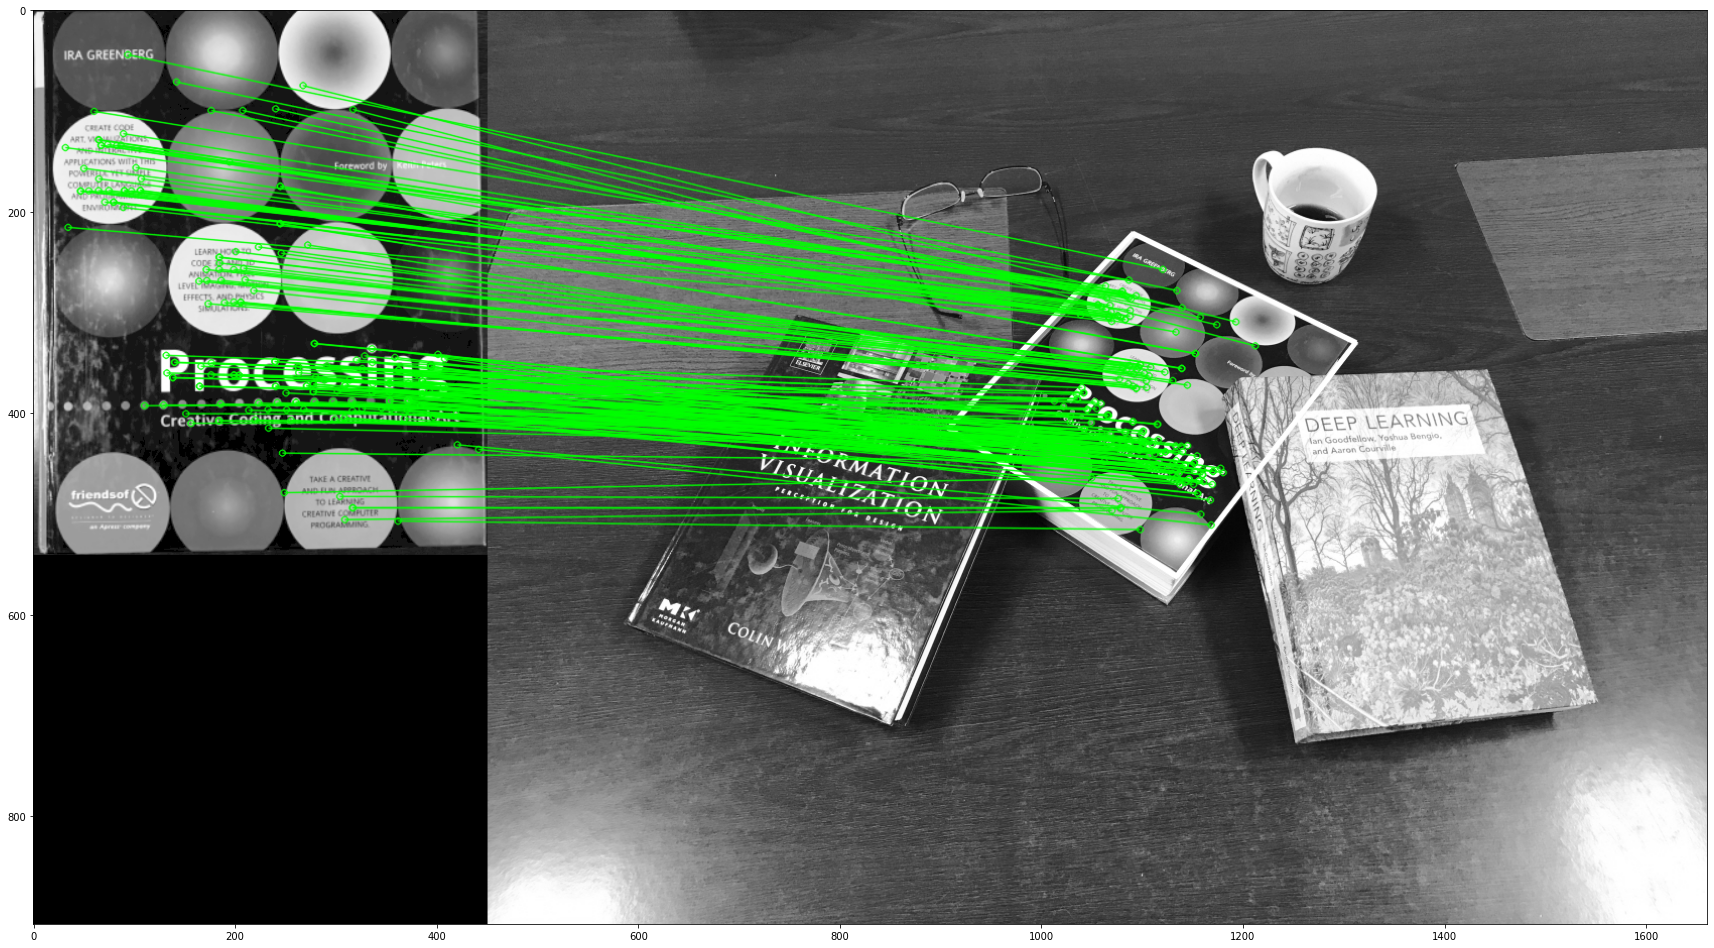

(<matplotlib.image.AxesImage at 0x1318eaee0>, None)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('images/book.png',0) # queryImage
img2 = cv2.imread('images/books.jpg',0) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)

MIN_MATCH_COUNT = 10
print(len(good))

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), singlePointColor = None, matchesMask = matchesMask, flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize = (30,30))
plt.imshow(img3, 'gray'),plt.show()

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('images/book.png',0)
img2 = cv2.imread('images/books.jpg',0)

orb = cv2.ORB()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)


img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
plt.imshow(img3),plt.show()

: 

: 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('images/book.png',0)
img2 = cv2.imread('images/books.png',0)

sift = cv2.SIFT()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)

plt.imshow(img3),plt.show()

: 

: 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)
sift = cv2.SIFT()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), singlePointColor = None, matchesMask = matchesMask, flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()


: 

: 